In [1]:
from scipy.io import loadmat
import json
import numpy as np
import random
random.seed(9999999)

In [2]:
train_idxs = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['train_idx'].flatten()-1
query_idxs = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['query_idx'].flatten()-1
gallery_idxs = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['gallery_idx'].flatten()-1
labels = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['labels'].flatten()
camId = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['camId'].flatten()
filelist = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['filelist'].flatten()

In [3]:
with open('PR_data/feature_data.json','r') as f:
    features = json.load(f)

In [4]:
features = np.array(features) # rows: pictures, columns: features (one row contains one image)

In [5]:
train_feat = features[train_idxs,:]
train_labels = labels[train_idxs]
train_camId = camId[train_idxs]
print(train_feat.shape)
print(train_labels.shape)
print(train_camId.shape)

query_feat = features[query_idxs,:]
query_labels = labels[query_idxs]
query_camId = camId[query_idxs]
print(query_feat.shape)
print(query_labels.shape)
print(query_camId.shape)

gallery_feat = features[gallery_idxs,:]
gallery_labels = labels[gallery_idxs]
gallery_camId = camId[gallery_idxs]
print(gallery_feat.shape)
print(gallery_labels.shape)
print(gallery_camId.shape)

(7368, 2048)
(7368,)
(7368,)
(1400, 2048)
(1400,)
(1400,)
(5328, 2048)
(5328,)
(5328,)


In [6]:
unique_id_train = np.unique(train_labels) #find all unique training IDs
unique_id_val = unique_id_train[np.array(random.sample(range(unique_id_train.shape[0]),100))] # pick 100 random unique training IDs, random.sample does not work on numpy array 
print(unique_id_val, unique_id_val.shape)
bool_idx_val = np.isin(train_labels, unique_id_val)
bool_idx_train_noval = np.isin(train_labels, unique_id_val, invert=True)
print(np.sum(bool_idx_val), bool_idx_val.shape)
print(np.sum(bool_idx_train_noval), bool_idx_train_noval.shape)

train_noval_feat = train_feat[bool_idx_train_noval,:]
train_noval_labels = train_labels[bool_idx_train_noval]
train_noval_camId = train_camId[bool_idx_train_noval]
train_noval_filelist_idxs = train_idxs[bool_idx_train_noval]
print(train_noval_feat.shape)
print(train_noval_labels.shape)
print(train_noval_camId.shape)
print(train_noval_filelist_idxs.shape)

val_feat = train_feat[bool_idx_val,:]
val_labels = train_labels[bool_idx_val]
val_camId = train_camId[bool_idx_val]
val_filelist_idxs = train_idxs[bool_idx_val]
print(val_feat.shape)
print(val_labels.shape)
print(val_camId.shape)
print(val_filelist_idxs.shape)

print(unique_id_train.shape, np.unique(train_noval_labels).shape, np.unique(val_labels).shape)

[ 787 1164  741  417 1346  641  169  363  168 1340  987 1437  613  809
  814  251 1082  608  977  620  776  279  876  117  318 1462 1129  601
   52  920  658 1115  667  992    8 1184 1180   39 1109  313  252   26
   16  788  644  540 1237   88  538  700 1290   10  513  104  302  480
  553 1235  811   48  395  901   83   66 1076   59  810 1050 1260   31
 1156 1284  486   19 1196  800  199 1364 1287 1158   71   46 1386 1391
  765  781 1374  801  712 1315 1085   93  248  154 1151 1268  978 1169
   94  628] (100,)
950 (7368,)
6418 (7368,)
(6418, 2048)
(6418,)
(6418,)
(6418,)
(950, 2048)
(950,)
(950,)
(950,)
(767,) (667,) (100,)


In [7]:
np.savetxt('train_feat.gzip', train_feat)
np.savetxt('train_labels.gzip', train_labels)
np.savetxt('train_camId.gzip', train_camId)
np.savetxt('query_feat.gzip', query_feat)
np.savetxt('query_labels.gzip', query_labels)
np.savetxt('query_camId.gzip', query_camId)
np.savetxt('gallery_feat.gzip', gallery_feat)
np.savetxt('gallery_labels.gzip', gallery_labels)
np.savetxt('gallery_camId.gzip', gallery_camId)
np.savetxt('val_feat.gzip', val_feat)
np.savetxt('val_labels.gzip', val_labels)
np.savetxt('val_camId.gzip', val_camId)
np.savetxt('val_filelist_idxs.gzip', val_filelist_idxs)
np.savetxt('train_noval_feat.gzip', train_noval_feat)
np.savetxt('train_noval_labels.gzip', train_noval_labels)
np.savetxt('train_noval_camId.gzip', train_noval_camId)
np.savetxt('train_noval_filelist_idxs.gzip', train_noval_filelist_idxs)

In [8]:
print(np.unique(labels).shape)

(1467,)


In [9]:
print(camId[labels==1351])

[2 2 2 2 2]


In [10]:
print (filelist)

[array(['1_001_1_01.png'], dtype='<U14')
 array(['1_001_1_02.png'], dtype='<U14')
 array(['1_001_1_03.png'], dtype='<U14') ...
 array(['5_049_2_08.png'], dtype='<U14')
 array(['5_049_2_09.png'], dtype='<U14')
 array(['5_049_2_10.png'], dtype='<U14')]


In [11]:
print (filelist.shape, filelist.dtype)

(14096,) object


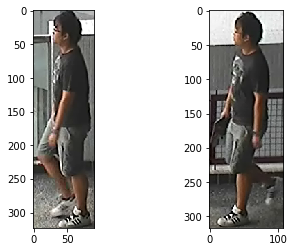

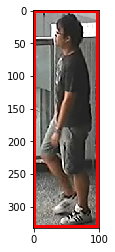

In [18]:
import matplotlib.pyplot as plt

def printpics (queryid, nnn_idx)

img1 = plt.imread('PR_data/images_cuhk03/'+filelist[0].item(0))
img2 = plt.imread('PR_data/images_cuhk03/'+filelist[1].item(0))
plt.figure()
plt.subplot(121)
plt.imshow(img1)

plt.subplot(122)
plt.imshow(img2)
plt.show()

from PIL import Image, ImageOps
#import Image, ImageOps
#ImageOps.expand(Image.open('original-image.png'),border=300,fill='black').save('imaged-with-border.png')

img = Image.open('PR_data/images_cuhk03/'+filelist[0].item(0))
img_with_border = ImageOps.expand(img,border=5,fill='red')
img_with_border.save('imaged-with-border.png')
plt.figure()
plt.imshow(img_with_border)
plt.show()

#for i in list-of-images:
#  img = Image.open(i)
#  img_with_border = ImageOps.expand(img,border=300,fill='black')
#  img_with_border.save('bordered-%s' % i)